# Residential Smart Meter

Basic analysis of residential load profiles

## Load and set up data

In [41]:
# import packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# load data
# source of climate zones: https://gis.data.ca.gov/datasets/CAEnergy::california-building-climate-zones/explore
data_dir = "./data/smart_meter/res_load_by_cz.csv" # cz = climate zone
#cz_bound_dir = "./data/boundaries/ca_bound_cz.geojson"
# Note: shapefile used here because geojson file has something weird going on with area and length
cz_bound_dir = "./data/boundaries/ca_bound_cz_shp.zip"
df_res_load_cz = pd.read_csv(data_dir)
df_cz_bound = gpd.read_file(cz_bound_dir)
df_res_load_cz

,Unnamed: 0.1,Unnamed: 0,cz,month,day,count,mean,std,min,0%,...,93%,94%,95%,96%,97%,98%,99%,100%,max,hour
0,0,0,6,1,1,470488,0.567980,1.183841,0,0,...,1.43,1.54000,1.6600,1.810000,2.03,2.40,3.21000,162.399994,162.399994,0
1,1,1,6,1,2,490558,0.572049,1.196480,0,0,...,1.44,1.55000,1.6700,1.830000,2.06,2.43,3.30000,164.000000,164.000000,0
2,2,2,6,1,3,508613,0.577376,1.223104,0,0,...,1.46,1.57000,1.6900,1.850000,2.08,2.46,3.35000,178.399994,178.399994,0
3,3,3,6,1,4,509034,0.589173,1.239516,0,0,...,1.51,1.61000,1.7400,1.910000,2.15,2.54,3.42868,169.600006,169.600006,0
4,4,4,6,1,5,516936,0.592133,1.245464,0,0,...,1.51,1.62000,1.7500,1.910000,2.16,2.55,3.46000,187.199997,187.199997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,583,583,16,12,3,90272,0.790314,2.462066,0,0,...,1.97,2.10000,2.2636,2.460000,2.74,3.12,3.86000,176.000000,176.000000,23
14108,584,584,16,12,4,95344,0.798119,2.486588,0,0,...,1.99,2.12168,2.2900,2.480000,2.77,3.15,3.93000,176.000000,176.000000,23
14109,585,585,16,12,5,87070,0.829973,2.498842,0,0,...,2.06,2.19000,2.3500,2.557568,2.83,3.24,4.07000,176.000000,176.000000,23
14110,586,586,16,12,6,90862,0.839411,2.570310,0,0,...,2.08,2.22000,2.3800,2.580000,2.86,3.27,4.11000,192.000000,192.000000,23


In [17]:
# clean data
df_res_load_cz.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
df_res_load_cz

,cz,month,day,count,mean,std,min,0%,1%,2%,...,93%,94%,95%,96%,97%,98%,99%,100%,max,hour
0,6,1,1,470488,0.567980,1.183841,0,0,0.02,0.04,...,1.43,1.54000,1.6600,1.810000,2.03,2.40,3.21000,162.399994,162.399994,0
1,6,1,2,490558,0.572049,1.196480,0,0,0.02,0.04,...,1.44,1.55000,1.6700,1.830000,2.06,2.43,3.30000,164.000000,164.000000,0
2,6,1,3,508613,0.577376,1.223104,0,0,0.02,0.04,...,1.46,1.57000,1.6900,1.850000,2.08,2.46,3.35000,178.399994,178.399994,0
3,6,1,4,509034,0.589173,1.239516,0,0,0.02,0.04,...,1.51,1.61000,1.7400,1.910000,2.15,2.54,3.42868,169.600006,169.600006,0
4,6,1,5,516936,0.592133,1.245464,0,0,0.02,0.04,...,1.51,1.62000,1.7500,1.910000,2.16,2.55,3.46000,187.199997,187.199997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,16,12,3,90272,0.790314,2.462066,0,0,0.00,0.01,...,1.97,2.10000,2.2636,2.460000,2.74,3.12,3.86000,176.000000,176.000000,23
14108,16,12,4,95344,0.798119,2.486588,0,0,0.00,0.01,...,1.99,2.12168,2.2900,2.480000,2.77,3.15,3.93000,176.000000,176.000000,23
14109,16,12,5,87070,0.829973,2.498842,0,0,0.00,0.00,...,2.06,2.19000,2.3500,2.557568,2.83,3.24,4.07000,176.000000,176.000000,23
14110,16,12,6,90862,0.839411,2.570310,0,0,0.00,0.01,...,2.08,2.22000,2.3800,2.580000,2.86,3.27,4.11000,192.000000,192.000000,23


In [18]:
df_cz_bound.rename({'BZone': 'cz'}, axis=1, inplace=True)
df_cz_bound

,OBJECTID,cz,BAcerage,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,2.263098e+06,1.322137e+06,9.158431e+09,MULTIPOLYGON Z (((-340188.579 446242.151 0.000...
1,2,10,2.008073e+06,6.393278e+05,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430..."
2,3,11,5.852273e+06,1.110781e+06,2.368330e+10,"POLYGON Z ((-161187.932 328571.169 0.000, -161..."
3,4,12,7.639111e+06,1.231641e+06,3.091438e+10,"MULTIPOLYGON Z (((-77283.463 103149.436 0.000,..."
4,5,13,8.154006e+06,1.054399e+06,3.299809e+10,"POLYGON Z ((33261.410 -71619.339 0.000, 33742...."
5,6,14,1.682699e+07,2.782494e+06,6.809638e+10,MULTIPOLYGON Z (((234669.979 -105289.817 0.000...
6,7,15,7.372182e+06,1.775625e+06,2.983416e+10,"POLYGON Z ((489570.303 -322959.029 0.000, 4897..."
7,8,16,3.458417e+07,5.194097e+06,1.399571e+11,MULTIPOLYGON Z (((-340437.117 449427.797 0.000...
8,9,2,5.027297e+06,1.221183e+06,2.034475e+10,MULTIPOLYGON Z (((-292867.427 378950.413 0.000...
9,10,3,2.041871e+06,1.788472e+06,8.263156e+09,"MULTIPOLYGON Z (((-194869.875 7679.375 0.000, ..."


In [27]:
df_cz_bound = df_cz_bound.astype({'cz': 'int64'})
df_cz_bound['cz'].dtypes

dtype('int64')

In [28]:
df_res_load_cz['cz'].dtypes

dtype('int64')

In [20]:
df_cz_bound.area

0     9.158431e+09
1     8.126380e+09
2     2.368330e+10
3     3.091438e+10
4     3.299809e+10
5     6.809638e+10
6     2.983416e+10
7     1.399571e+11
8     2.034475e+10
9     8.263156e+09
10    1.853613e+10
11    7.952152e+09
12    2.539404e+09
13    1.844144e+09
14    2.118360e+09
15    4.195661e+09
dtype: float64

<AxesSubplot:>

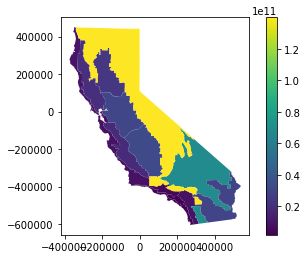

In [29]:
df_cz_bound.plot("SHAPE_Area", legend=True)

In [30]:
# Coordinate reference system (CRS) information
df_cz_bound.crs

<Derived Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
# merge data with boundaries
df_res_load_cz_merged = df_cz_bound.merge(df_res_load_cz, on = 'cz')
print(df_res_load_cz_merged.shape)
df_res_load_cz_merged

(14112, 115)


,OBJECTID,cz,BAcerage,SHAPE_Leng,SHAPE_Area,geometry,month,day,count,mean,...,93%,94%,95%,96%,97%,98%,99%,100%,max,hour
0,2,10,2.008073e+06,639327.754493,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430...",1,1,634832,0.649510,...,1.55,1.65,1.780,1.940,2.15,2.470000,3.070000,126.400002,126.400002,0
1,2,10,2.008073e+06,639327.754493,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430...",1,2,662291,0.649435,...,1.56,1.67,1.790,1.950,2.16,2.480000,3.120000,147.839996,147.839996,0
2,2,10,2.008073e+06,639327.754493,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430...",1,3,687160,0.652664,...,1.57,1.68,1.810,1.960,2.17,2.500000,3.130000,155.160004,155.160004,0
3,2,10,2.008073e+06,639327.754493,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430...",1,4,687125,0.669644,...,1.62,1.73,1.860,2.020,2.25,2.597328,3.262508,140.759995,140.759995,0
4,2,10,2.008073e+06,639327.754493,8.126380e+09,"POLYGON Z ((242173.551 -419755.614 1.000, 2430...",1,5,696680,0.673275,...,1.64,1.75,1.880,2.040,2.27,2.620000,3.280000,138.240005,138.240005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,16,9,1.036771e+06,539798.759186,4.195661e+09,MULTIPOLYGON Z (((125836.385 -384117.775 0.000...,12,3,620184,0.796883,...,1.96,2.08,2.230,2.420,2.68,3.090000,3.920000,88.000000,88.000000,23
14108,16,9,1.036771e+06,539798.759186,4.195661e+09,MULTIPOLYGON Z (((125836.385 -384117.775 0.000...,12,4,653346,0.806307,...,1.99,2.11,2.260,2.450,2.73,3.140000,4.000000,96.000000,96.000000,23
14109,16,9,1.036771e+06,539798.759186,4.195661e+09,MULTIPOLYGON Z (((125836.385 -384117.775 0.000...,12,5,596697,0.823413,...,2.01,2.13,2.280,2.480,2.74,3.140000,4.000000,88.000000,88.000000,23
14110,16,9,1.036771e+06,539798.759186,4.195661e+09,MULTIPOLYGON Z (((125836.385 -384117.775 0.000...,12,6,623349,0.835351,...,2.05,2.18,2.330,2.526,2.80,3.210000,4.070000,88.000000,88.000000,23


## Basic analyses

In [40]:
# How many unique climate zones?
print(df_res_load_cz_merged['cz'].unique())

[10 14 15 16  6  8  9]


Examine the difference in load profile shapes between climate zones and months

([<matplotlib.axis.XTick at 0x14c6aafe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

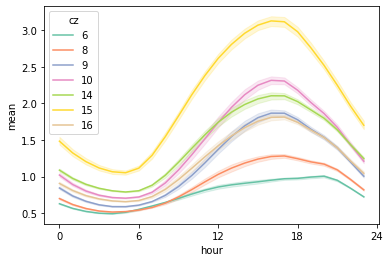

In [69]:
# Let's first look at only a summer month. We choose July as an example. 
df_july = df_res_load_cz_merged[df_res_load_cz_merged['month'] == 7]
ticks = list(range(0,25,6))
sns.lineplot(data=df_july, x='hour', y='mean', hue='cz', palette='Set2')
plt.xticks(ticks)

([<matplotlib.axis.XTick at 0x14c784460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

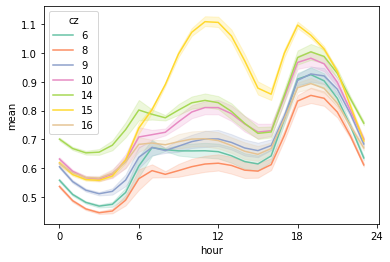

In [70]:
# Let's first look at only a winter month. We choose February as an example. 
df_feb = df_res_load_cz_merged[df_res_load_cz_merged['month'] == 2]
sns.lineplot(data=df_feb, x='hour', y='mean', hue='cz', palette='Set2')
plt.xticks(ticks)

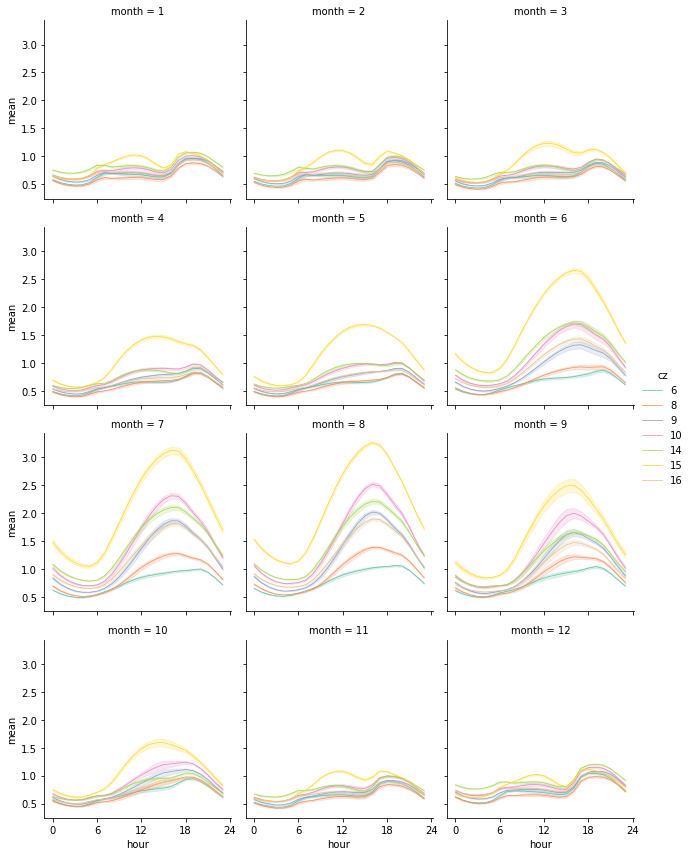

In [78]:
# Now we plot the load profiles faceted by month, categorized by cz
g = sns.FacetGrid(df_res_load_cz_merged, col_wrap=3, col='month', hue='cz', palette='Set2')
g.map(sns.lineplot, 'hour', 'mean', size=0.8)
g.add_legend()
plt.xticks(ticks)
plt.savefig('./plots/load_by_month_cz.pdf', format='pdf')